In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folders = ["result_sf1/", "result_sf2/", "result_sf5/"]
scales = ["sf1", "sf2", "sf5"]
variations = ["all", "dates_text", "dates", "no_index", "numbers_dates", "numbers_text", "numbers", "text", "default_index"]

In [3]:
def read_log_file(path):
   filecontent = ""
   with open(path, "r") as f:
      filecontent = f.readlines()
   return filecontent


In [4]:
filecontent = read_log_file("result_sf1/results_all.log")

In [5]:
def get_query_number(line: str)->int:
   splitted = line.split(" ")
   return int(splitted[1])

def get_numbers(line: str):
   splitted = line.split(",")
   numbers = [float(number) for number in splitted]
   return numbers


In [6]:
def get_execution_times(line:str):
   splitted = line.split(":")
   text = splitted[0]
   query_number = get_query_number(text)
   numbers_text = splitted[1]
   numbers_list = get_numbers(numbers_text)

   return query_number, numbers_list
   



In [7]:
get_execution_times("Query 2 execution times in seconds: 0.154,0.153,0.152,0.148,0.153,0.148,0.153,0.152,0.151,0.149")

(2, [0.154, 0.153, 0.152, 0.148, 0.153, 0.148, 0.153, 0.152, 0.151, 0.149])

In [8]:
def get_query_numbers_and_exec_time(filecontent: list[str]):
   query_numbers = []
   execution_times = []
   for line in filecontent:
      if not "execution times" in line:
         continue
      query_number, ex_times = get_execution_times(line.strip())
      query_numbers.append(query_number)
      execution_times.append(ex_times)
   return query_numbers, execution_times

In [9]:
columns = ["scale", "avg"]

In [10]:
for scale in scales:
   df = pd.DataFrame(columns=variations)
   for variation in variations:
      folder = "result_" + scale + "/" 
      path =  folder + "results_" + variation + ".log"
      filecontent = read_log_file(path)
      query_numbers, execution_times = get_query_numbers_and_exec_time(filecontent)
      df[variation] = [np.mean(exec_time) * 1000 for exec_time in execution_times]
   df.to_csv(folder + "avg_exec_time.csv", index=False)


In [11]:
def display_query(df: pd.DataFrame, scale: str, query: int):
   if query > 22 or query < 0:
      raise ValueError()
   
   plt.figure()
   row = df.iloc[query-1]
   row.plot(kind="bar")
   plt.title(f"{scale} - Q{query}")
   plt.show()

def display_query_for_scale(scale: str, query:int):
   path = "result_" + scale + "/" + "avg_exec_time.csv"
   df = pd.read_csv(path)
   display_query(df, scale, query)
   

In [12]:
def display_4_queries(scale: str, four_quries:list[int]):
   path = f"result_{scale}/avg_exec_time.csv"
   df = pd.read_csv(path)
   fig, axes = plt.subplots(2, 2, figsize=(8, 8))  # 6 rows, 4 columns

   for i in range(1, 5):  # Assuming 22 queries, adjust if needed
      row = (i - 1) // 2
      col = (i - 1) % 2
      ax = axes[row, col]
      # Ge query index from the list
      query_idx = four_quries[i-1]
      # query_idx 
      df.iloc[query_idx-1].plot(kind="bar", ax=ax)
      ax.set_title(f"Query {four_quries[i-1]}")
      ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x-tick labels
      ax.spines["top"].set_visible(False)
      ax.spines["right"].set_visible(False)
      ax.spines["left"].set_visible(False)
      ax.set_yticks(range(0, 201, 50))

   # Hide any unused subplots
   plt.tight_layout()
   plt.savefig(f"imgs/fig_{scale}_sub")
   plt.show()

In [13]:
df

,all,dates_text,dates,no_index,numbers_dates,numbers_text,numbers,text,default_index
0,192.7,183.0,185.9,184.7,189.1,186.7,185.7,186.0,186.1
1,196.9,196.7,193.6,197.3,202.4,201.6,197.0,198.4,196.0
2,191.7,191.0,182.6,192.4,193.9,197.7,195.7,195.9,194.8
3,185.0,185.6,183.2,185.7,186.0,188.7,191.3,186.5,183.8
4,191.7,195.9,195.4,198.4,200.9,197.3,202.7,203.6,198.5
5,180.2,178.1,183.7,182.0,187.9,184.7,186.3,182.8,184.8
6,201.1,203.6,197.3,199.9,200.4,200.1,204.0,203.0,198.8
7,206.8,207.2,200.7,197.4,197.8,206.3,205.5,207.9,203.1
8,202.1,202.6,204.4,198.9,207.4,210.1,207.6,209.4,199.7
9,190.5,198.6,190.4,195.4,199.2,195.0,190.1,195.8,195.4


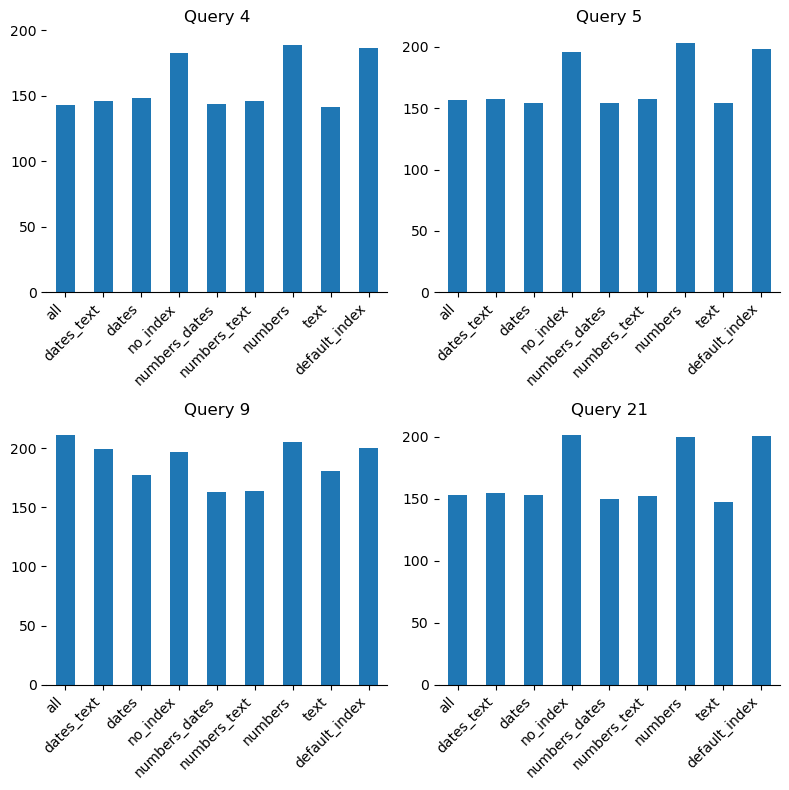

In [14]:
display_4_queries("sf1", [4, 5, 9, 21])


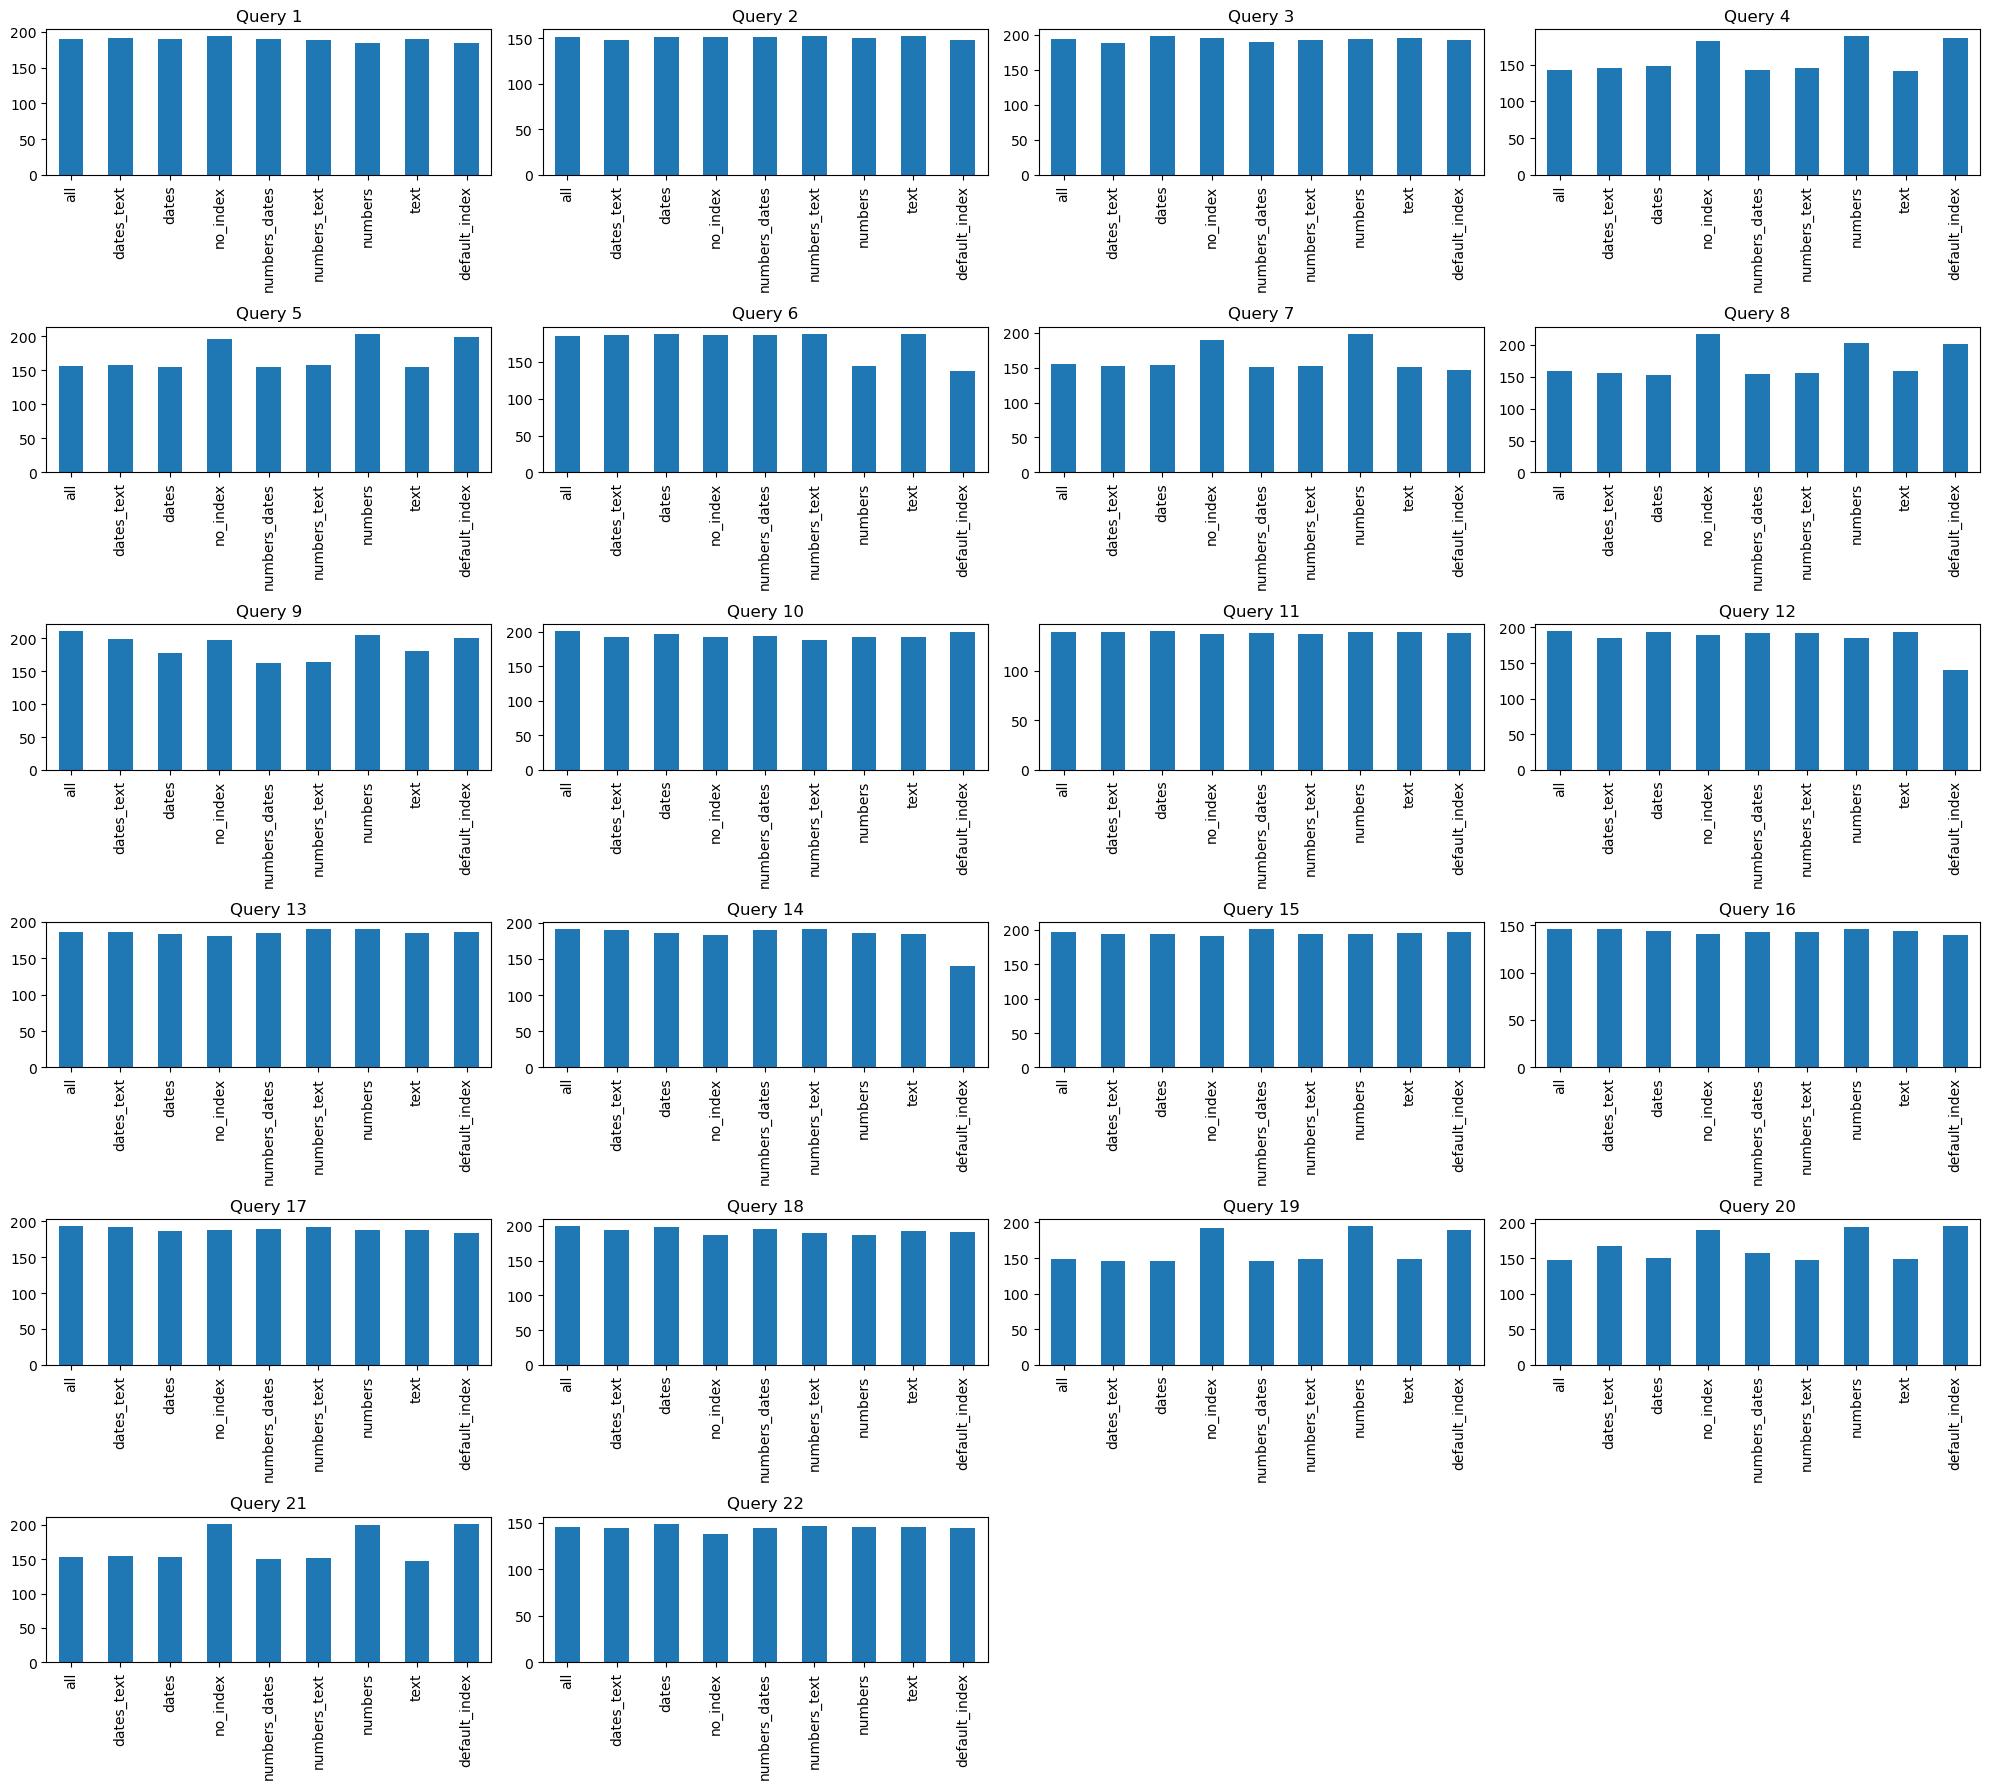

In [15]:
def display_all_queries_for_scale(scale: str):
    path = f"result_{scale}/avg_exec_time.csv"
    df = pd.read_csv(path)
    fig, axes = plt.subplots(6, 4, figsize=(20, 18))  # 6 rows, 4 columns

    for i in range(1, 23):  # Assuming 22 queries, adjust if needed
        row = (i - 1) // 4
        col = (i - 1) % 4
        ax = axes[row, col]
        df.iloc[i-1].plot(kind="bar", ax=ax)
        ax.set_title(f"Query {i}")

    # Hide any unused subplots
    for j in range(22, 24):
        row = j // 4
        col = j % 4
        axes[row, col].axis('off')

    plt.tight_layout()
    plt.savefig(f"imgs/fig_{scale}_all")
    plt.show()

# Example usage:
display_all_queries_for_scale("sf1")

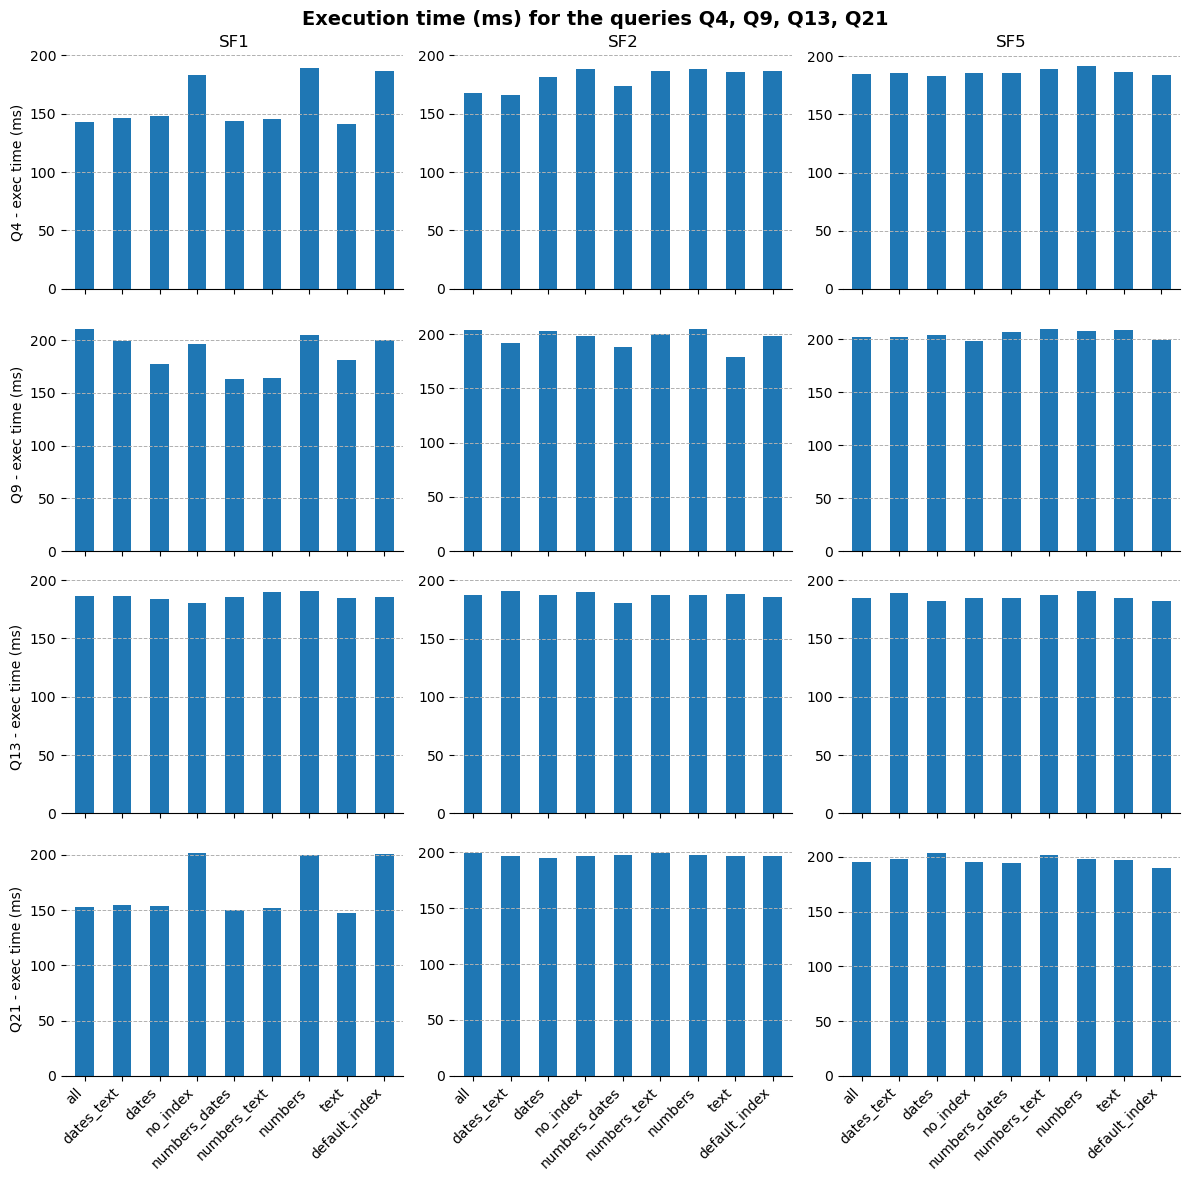

In [26]:
def display_4_queries_all_scales_grid(four_queries: list[int]):
    scales = ["sf1", "sf2", "sf5"]  # Add/remove scales as needed
    fig, axes = plt.subplots(len(four_queries), len(scales), figsize=(12, 12))  # rows: queries, cols: scales
    for col, scale in enumerate(scales):
        path = f"result_{scale}/avg_exec_time.csv"
        df = pd.read_csv(path)
        for row, query_idx in enumerate(four_queries):
            ax = axes[row, col]
            if col == 0:
               ax.set_ylabel(f"Q{query_idx} - exec time (ms)")
            
            df.iloc[query_idx-1].plot(kind="bar", ax=ax, zorder=1)
            if row == 0:
               ax.set_title(f"{scale.upper()}")

            
            ax.set_yticks(range(0, 201, 50))
            ax.spines["top"].set_visible(False)
            ax.spines["right"].set_visible(False)
            ax.spines["left"].set_visible(False)
            ax.yaxis.grid(True, which='major', linestyle='--', linewidth=0.7, zorder=0)
            if row != len(four_queries) - 1:
                ax.set_xticklabels("")  # Hide x-labels except for last row
            else:
               ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
            

    fig.suptitle("Execution time (ms) for the queries " + ", ".join(["Q"+str(value) for value in four_queries]), fontweight="bold", fontsize=14)
    plt.tight_layout()
    plt.savefig("imgs/4_queries_all_scales_grid.png")
    plt.show()

# Example usage:
display_4_queries_all_scales_grid([4, 9, 13, 21])